Q3 Import the required packages with their customary aliases as follows: 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Q4 Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [18]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')


In [19]:
gdp_df


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [20]:
print (gdp_df.head(10))
print (gdp_df.tail(10))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
5     Afghanistan  2016  2101.422187              NaN
6     Afghanistan  2015  2108.714173              NaN
7     Afghanistan  2014  2144.449634              NaN
8     Afghanistan  2013  2165.340915              NaN
9     Afghanistan  2012  2122.830759              NaN
     Country or Area  Year        Value  Value Footnotes
7652        Zimbabwe  1999  2866.032886              NaN
7653        Zimbabwe  1998  2931.725144              NaN
7654        Zimbabwe  1997  2896.147308              NaN
7655        Zimbabwe  1996  2867.026043              NaN
7656        Zimbabwe  1995  2641.378271              NaN
7657        Zimbabwe  1994  2670.106615              NaN
7658   

Q5. How many rows and columns are in gdp_df? What are the data types of each column?

In [21]:
print(gdp_df.info)
print(gdp_df.dtypes)

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Q6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [22]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [23]:
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()
count_years = gdp_df['Year'].nunique()

print('Min Year: ' + str(min_year))
print('Max Year: ' + str(max_year))
print('Number of years in dataset: ' + str(count_years))

country_list = gdp_df.groupby('Country')["Country"].count().reset_index(name='year_count').sort_values(by='year_count')

count_countries_complete_data = len(country_list[country_list["year_count"] == count_years])
print("Count of countries with data for all years: " + str(count_countries_complete_data))

countries_missing_data = country_list[country_list["year_count"] < count_years]
print("Countries missing data:") 
print(countries_missing_data)

Min Year: 1990
Max Year: 2022
Number of years in dataset: 33
Count of countries with data for all years: 202
Countries missing data:
                       Country  year_count
53                    Djibouti          10
197                    Somalia          10
225   Turks and Caicos Islands          12
192  Sint Maarten (Dutch part)          14
112                     Kosovo          15
36              Cayman Islands          16
154                      Nauru          19
0                  Afghanistan          20
47                    CuraÃ§ao          22
169                      Palau          22
213    SÃ£o TomÃ© and Principe          22
180                      Qatar          23
166         Other small states          23
219                Timor-Leste          23
124                    Liberia          23
125                      Libya          24
185                 San Marino          25
195               Small states          26
149                 Montenegro          26
135    

q8 n this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [9]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


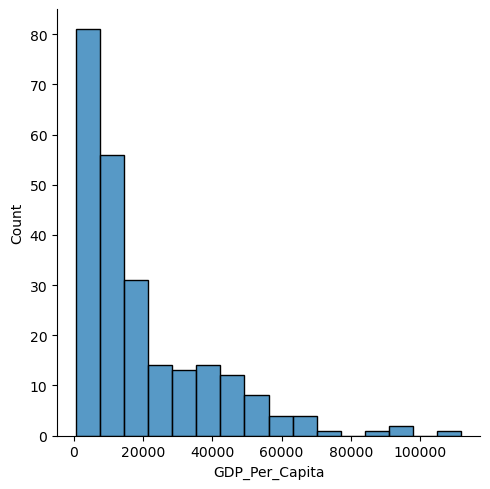

In [24]:
sns.displot(data=gdp_2020["GDP_Per_Capita"])

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

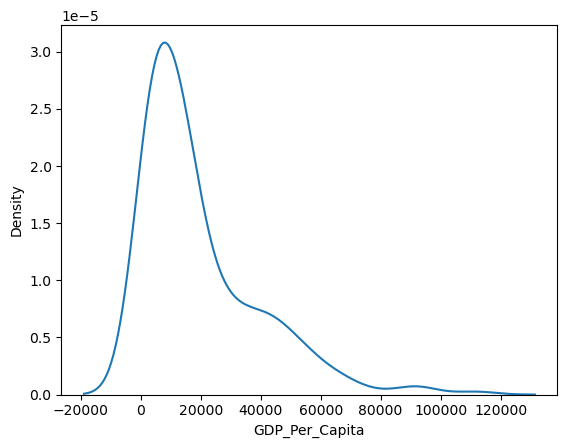

In [25]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

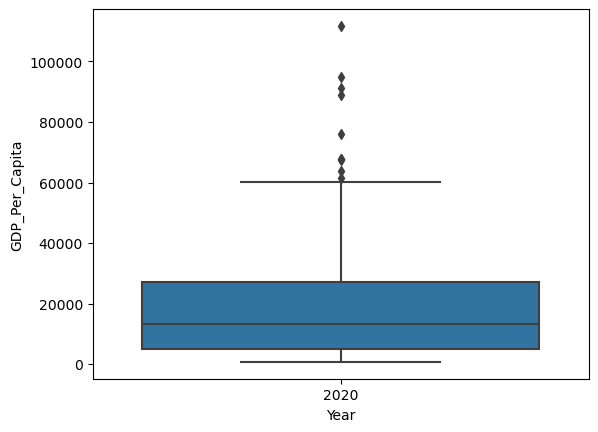

In [26]:
sns.boxplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

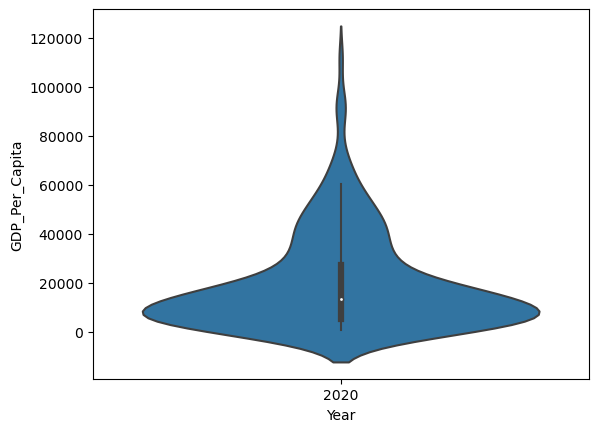

In [13]:
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

Q9. What was the median GDP per capita value in 2020?

In [27]:
med_gdp2020 = gdp_2020["GDP_Per_Capita"].median()
print(round((med_gdp2020), 2))

13358.0


Q10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

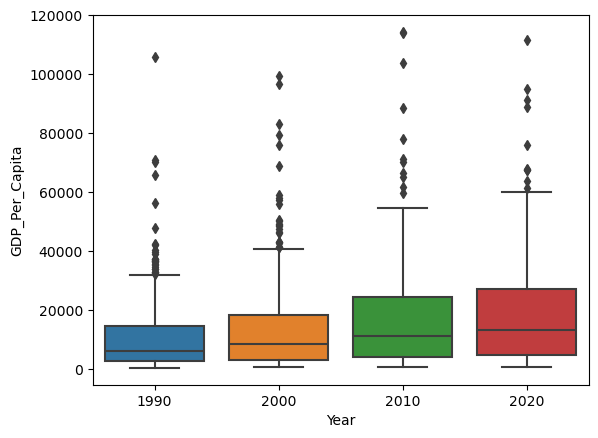

In [28]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

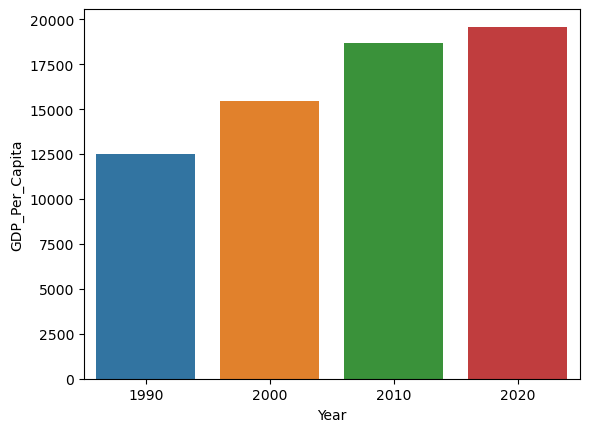

In [29]:
sns.barplot(x="Year",
            y="GDP_Per_Capita",
            data=gdp_decades,
           errorbar=None)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

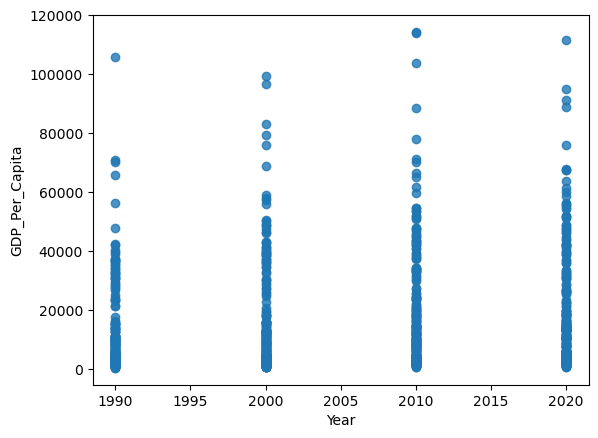

In [30]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

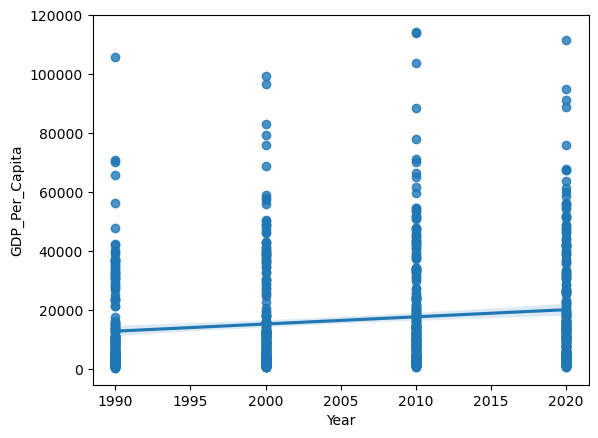

In [31]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=True)

Q11. Which country was the first to have a GDP per capita greater than $100,000?

In [32]:
#All countries with 100,000 GDP Per Capita
gdp_100k = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

#earliest year
min_year_100k = gdp_100k["Year"].min()

#country/countries
first_100k_gdp = gdp_100k[gdp_100k["Year"] == min_year_100k]

#answer
print(round(first_100k_gdp, 2))

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990       105893.63


Q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [33]:
highest_gdp2020 = gdp_2020[gdp_2020["GDP_Per_Capita"] == gdp_2020["GDP_Per_Capita"].max()]
print("Country with the greatest GDP Per Capita in 2020:")
print(highest_gdp2020)

Country with the greatest GDP Per Capita in 2020:
         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


In [ ]:
lux_all = gdp_df[gdp_df["Country"] == "Luxembourg"]